In [1]:
import matplotlib.pyplot as plt 
import metapack as mp
import pandas as pd
import numpy as np

In [2]:
pkg = mp.jupyter.open_package()
pkg

In [3]:
pkg.resource('water_levels')

Header,Type,Description
date_time,datetime,
water_level,number,"Water level, relative to datum, in feet"
type,string,"HH Daily high, H High, LL Daily Low, L Low"
I,integer,
L,integer,


In [4]:
df = pkg.resource('water_levels').read_csv(parse_dates=True)
df.head()

,date_time,water_level,type,I,L
0,2000-01-01 02:00:00,3.081,H,0,0
1,2000-01-01 07:06:00,1.546,L,0,0
2,2000-01-01 13:42:00,5.043,HH,0,0
3,2000-01-01 21:00:00,0.348,LL,0,0
4,2000-01-02 02:48:00,3.094,H,0,0


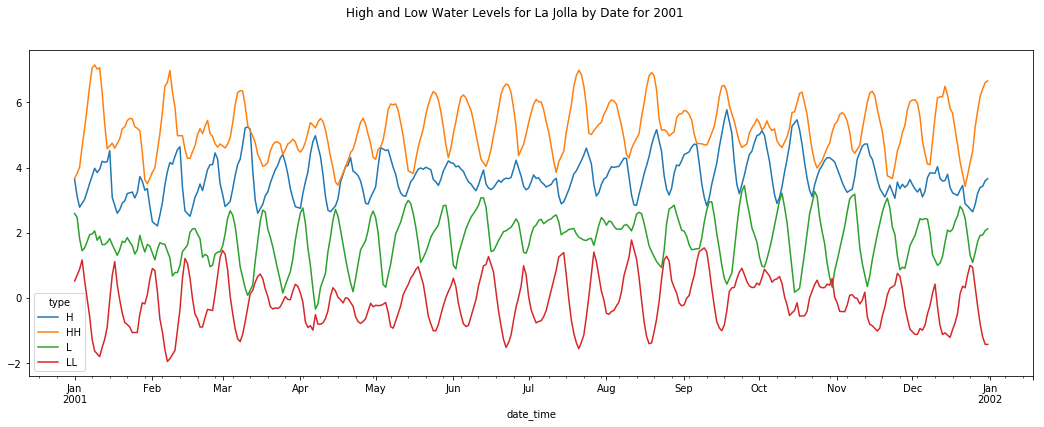

In [6]:
fig, ax = plt.subplots(1,figsize=(18,6))
fig.suptitle('High and Low Water Levels for La Jolla by Date for 2001')

_ = df.set_index(['type','date_time'])['water_level'].unstack(0).resample('1d').max()

_.loc['2001':'2001'].interpolate().plot(ax=ax);
plt.savefig('../doc/water_levels.png')